In [38]:
import numpy as np
import cv2
import os
import io
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
images = os.listdir("/home/vasu/all_projects/GSoC/Open-food-facts/packing classifier/")

In [40]:
path = "/home/vasu/all_projects/GSoC/Open-food-facts/packing classifier/"

In [41]:
len(images)

885

In [42]:
# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()

In [43]:
img = cv2.imread(path + images[0])

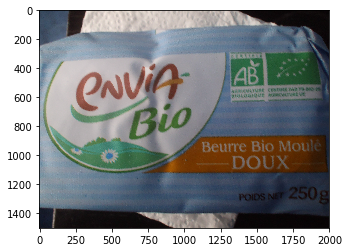

In [44]:
plt.imshow(img)

In [45]:
lable_dict = {}

In [46]:
for ix in range(len(images)):
    # Loads the image into memory
    with io.open(path + images[ix], 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)

    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations

    lable_dict[images[ix]] = labels

In [48]:
import csv
 
w = csv.writer(open("output.csv", "wb"))
for key, val in lable_dict.items():
    w.writerow([key, str(val)])